# Predicting feature Y using Machine Learning


This notebook will introduce some foundation machine learning and data science concepts by exploring the problem of binary classification.

## More specifically, we'll look at the following topics.

Exploratory data analysis (EDA) - the process of going through a dataset and finding out more about it.

Model training - create model(s) to learn to predict a target variable based on other variables.

Model evaluation - evaluating a models predictions using problem-specific evaluation metrics.

Model comparison - comparing several different models to find the best one.

Model fine-tuning - once we've found a good model, how can we improve it?

Feature importance - since we're predicting the Y variable, are there some things which are more important for prediction?

Cross-validation - if we do build a good model, can we be sure it will work on unseen data?

Reporting what we've found - if we had to present our work, what would we show someone?

To work through these topics, we'll use pandas, Matplotlib and NumPy for data anaylsis, as well as, Scikit-Learn for machine learning and modelling tasks.

# Preparing the tools

In [38]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.
import scipy.stats as stats 
import datetime as dt
%matplotlib inline
import math
#import pandas_profiling
from sklearn.model_selection import train_test_split # function for split the data into two parts
from sklearn import metrics # for the check the error and accuracy of the model

#from patsy import dmatrices
#from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression # for using the Logistic Regression Algorithm

print(pd.__version__)
print(np.__version__)
print(sns.__version__)

1.0.5
1.19.1
0.11.2


## Load data

In [39]:
train = pd.read_csv("Arya_DataScientist_Assignment/training_set.csv") # read the data
train.head() # print the first 5 rows of the data

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.34,0.00,0.00,1.20,2,12,0
1,1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.00,...,0.00,0.08,0.00,0.50,0.00,0.08,16.30,148,375,1
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1,5,0
3,3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.46,0.37,0.00,2.44,22,122,1
4,4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.00,...,0.00,0.00,0.00,0.24,0.24,0.00,3.34,123,207,1


In [40]:
test = pd.read_csv("Arya_DataScientist_Assignment/test_set.csv") # read the data
test.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0,0.70,0.00,0.70,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.10,0.00,0.00,2.34,47,89
1,1,0.00,0.00,0.84,0.00,0.84,0.00,0.84,0.00,0.00,...,0.00,0.00,0.39,0.00,0.78,0.13,0.00,10.38,168,249
2,2,0.46,0.30,0.46,0.00,0.05,0.12,0.05,0.28,0.43,...,0.00,0.00,0.07,0.00,0.33,0.76,0.15,5.89,193,3040
3,3,0.10,0.20,1.01,0.00,0.80,0.80,0.50,0.00,0.80,...,0.00,0.00,0.11,0.00,0.49,0.16,0.01,8.55,669,1351
4,4,0.00,0.00,0.72,0.00,0.72,0.00,0.72,0.00,0.00,...,0.00,0.00,0.36,0.00,0.73,0.12,0.00,7.78,32,249


# Create some UDF's

In [41]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):  # function for continuous variable summary
    return pd.Series([  # return the summary of the variable
        x.count(),
        x.isnull().sum(),
        x.sum(),
        x.mean(),
        x.median(),
        x.std(),
        x.var(),
        x.min(),
        x.quantile(0.01), # 1% quantile
        x.quantile(0.05),
        x.quantile(0.10),
        x.quantile(0.25),
        x.quantile(0.50),
        x.quantile(0.75),
        x.quantile(0.90),
        x.quantile(0.95),
        x.quantile(0.99), # 99% quantile
        x.max()
    ],
                     index=[
                         'N', 'NMISS', 'SUM', 'MEAN', 'MEDIAN', 'STD', 'VAR',
                         'MIN', 'P1', 'P5', 'P10', 'P25', 'P50', 'P75', 'P90',
                         'P95', 'P99', 'MAX'
                     ])

In [42]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x): # function for categorical variable summary
    Mode = x.value_counts().sort_values(ascending=False)[0:1].reset_index()
    return pd.Series([
        x.count(),
        x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1],
        round(Mode.iloc[0, 1] * 100 / x.count(), 2)
    ],
                     index=['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [43]:
train.info() # print the information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 59 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3910 non-null   int64  
 1   X1          3910 non-null   float64
 2   X2          3910 non-null   float64
 3   X3          3910 non-null   float64
 4   X4          3910 non-null   float64
 5   X5          3910 non-null   float64
 6   X6          3910 non-null   float64
 7   X7          3910 non-null   float64
 8   X8          3910 non-null   float64
 9   X9          3910 non-null   float64
 10  X10         3910 non-null   float64
 11  X11         3910 non-null   float64
 12  X12         3910 non-null   float64
 13  X13         3910 non-null   float64
 14  X14         3910 non-null   float64
 15  X15         3910 non-null   float64
 16  X16         3910 non-null   float64
 17  X17         3910 non-null   float64
 18  X18         3910 non-null   float64
 19  X19         3910 non-null  

In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 58 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  691 non-null    int64  
 1   X1          691 non-null    float64
 2   X2          691 non-null    float64
 3   X3          691 non-null    float64
 4   X4          691 non-null    float64
 5   X5          691 non-null    float64
 6   X6          691 non-null    float64
 7   X7          691 non-null    float64
 8   X8          691 non-null    float64
 9   X9          691 non-null    float64
 10  X10         691 non-null    float64
 11  X11         691 non-null    float64
 12  X12         691 non-null    float64
 13  X13         691 non-null    float64
 14  X14         691 non-null    float64
 15  X15         691 non-null    float64
 16  X16         691 non-null    float64
 17  X17         691 non-null    float64
 18  X18         691 non-null    float64
 19  X19         691 non-null    f

In [45]:
train.apply(continuous_var_summary) # apply the function for continuous variable summary

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
N,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,...,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00
NMISS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
SUM,7642095.00,402.69,807.10,1112.08,242.71,1217.22,375.26,439.17,414.62,356.38,...,146.60,544.48,62.07,1067.32,304.28,171.37,19734.36,204642.00,1106761.00,1534.00
MEAN,1954.50,0.10,0.21,0.28,0.06,0.31,0.10,0.11,0.11,0.09,...,0.04,0.14,0.02,0.27,0.08,0.04,5.05,52.34,283.06,0.39
MEDIAN,1954.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.07,0.00,0.00,0.00,0.00,2.26,15.00,94.00,0.00
STD,1128.86,0.30,1.25,0.50,1.37,0.66,0.26,0.39,0.40,0.27,...,0.24,0.28,0.08,0.86,0.26,0.45,31.40,204.45,578.34,0.49
VAR,1274334.17,0.09,1.57,0.25,1.88,0.43,0.07,0.15,0.16,0.07,...,0.06,0.08,0.01,0.74,0.07,0.21,985.77,41797.85,334476.99,0.24
MIN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00
P1,39.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,3.00,0.00
P5,195.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,6.00,0.00


In [46]:
# Let's see how many positive (1) and negative (0) samples we have in our dataframe
train.Y.value_counts() 

0    2376
1    1534
Name: Y, dtype: int64

In [47]:
# Normalized value counts
train.Y.value_counts(normalize=True) * 100 # print the value counts of the variable in terms of percentage

0   60.77
1   39.23
Name: Y, dtype: float64

### The data is a little unbalanced, but we can get away with oversampling or undersampling our data.

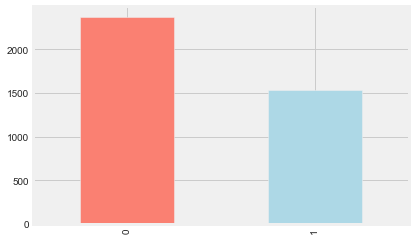

In [48]:
# Plot the value counts with a bar graph
train.Y.value_counts().plot(kind="bar", color=["salmon", "lightblue"]); 

In [49]:
train.describe() # print the summary of the data

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,...,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00,3910.00
mean,1954.50,0.10,0.21,0.28,0.06,0.31,0.10,0.11,0.11,0.09,...,0.04,0.14,0.02,0.27,0.08,0.04,5.05,52.34,283.06,0.39
std,1128.86,0.30,1.25,0.50,1.37,0.66,0.26,0.39,0.40,0.27,...,0.24,0.28,0.08,0.86,0.26,0.45,31.40,204.45,578.34,0.49
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00
25%,977.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.58,6.00,35.00,0.00
50%,1954.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.07,0.00,0.00,0.00,0.00,2.26,15.00,94.00,0.00
75%,2931.75,0.00,0.00,0.43,0.00,0.39,0.00,0.00,0.00,0.00,...,0.00,0.19,0.00,0.32,0.05,0.00,3.71,43.00,264.00,1.00
max,3909.00,4.34,14.28,4.54,42.81,9.09,3.57,7.27,11.11,3.23,...,4.38,9.75,2.78,32.48,6.00,19.83,1102.50,9989.00,10062.00,1.00


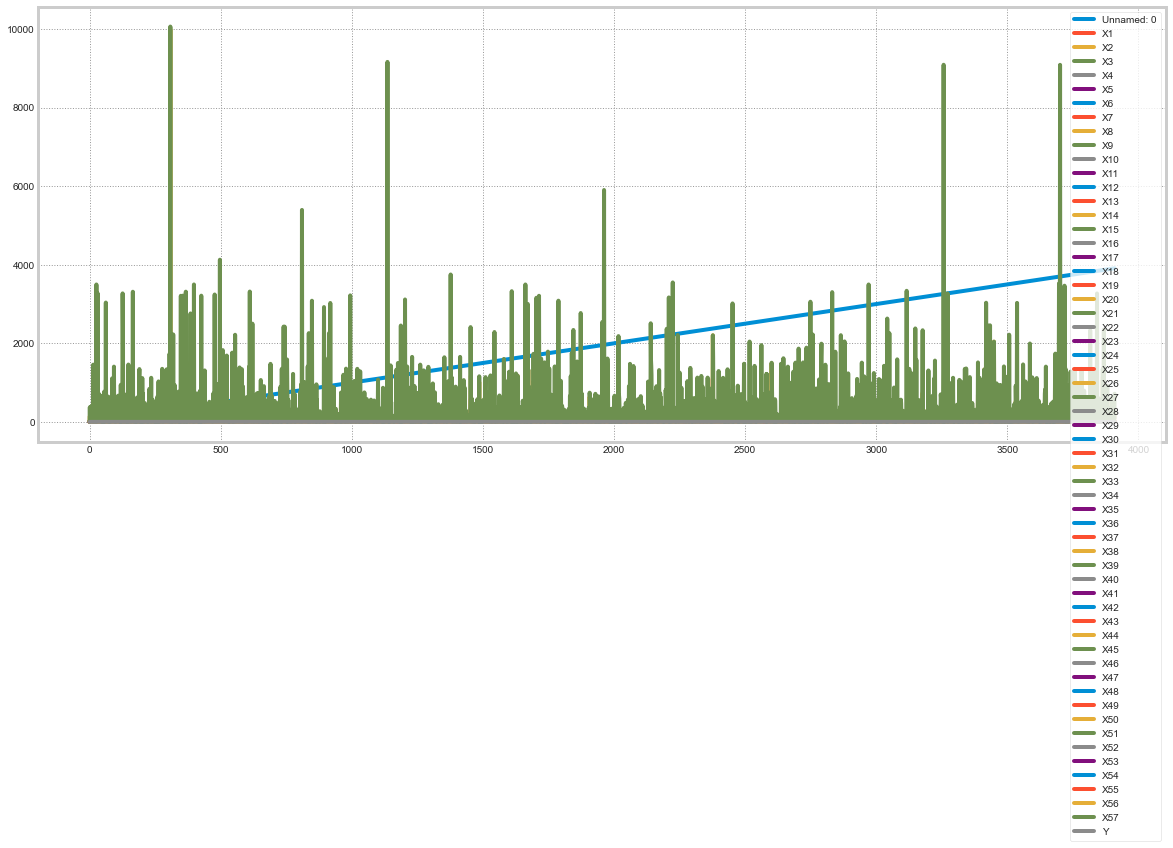

In [50]:
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
train.plot(figsize=(18, 8))
plt.style.use('fivethirtyeight')
plt.show()

## Removing Unnamed:0 column as it is a cardinal feature

In [51]:
train.drop(["Unnamed: 0"],axis = 1, inplace = True) # drop the unnamed column

In [52]:
train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.34,0.00,0.00,1.20,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.00,0.56,...,0.00,0.08,0.00,0.50,0.00,0.08,16.30,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.46,0.37,0.00,2.44,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.00,0.00,...,0.00,0.00,0.00,0.24,0.24,0.00,3.34,123,207,1


## Feature Selection - There are two ways to do this.

## Feature Selection (Statistical) - One way is to use a feature selection algorithm like filtering, wrapper and embedded methods.

## Feature Selection (Domain) - Another way is to use domain knowledge and intuition. For example, we can use the domain knowledge of the target variable to find features that are relevant to the problem. In this case, where we do not know the feature names, I will only use feature selection based on statistics and no domain knowledge or intuiton would be used.

## Splitting features with the Y variable

In [53]:
y = train.Y # assign the Y variable to y
X = train.copy() 
del X['Y'] # delete the Y variable from X

In [54]:
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.34,0.00,0.00,1.20,2,12
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.00,0.56,...,0.00,0.00,0.08,0.00,0.50,0.00,0.08,16.30,148,375
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1,5
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.46,0.37,0.00,2.44,22,122
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.00,0.00,...,0.00,0.00,0.00,0.00,0.24,0.24,0.00,3.34,123,207


## Set some amount of features

## Filter Feature Selection - Pearson Correlation

In [55]:
feature_name = list(X.columns) # assign the column names to the variable feature_name
# no of maximum features we need to select
num_feats=20

In [56]:
def cor_selector(X, y, num_feats): # function for correlation selection
    # Your code goes here (Multiple lines)
    
    cor_list = []
    feature_name = X.columns.tolist()
    
    # calculate the correlation with y for each feature
    
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
        
    # replace NaN with 0 to avoid compatibility issues
    
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    
    # feature names
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    
    # feature selection: Select Features which return 1 and leave others.
    cor_support = [True if i in cor_feature else False for i in feature_name]

    # Your code ends here
    return cor_support, cor_feature

In [57]:
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

20 selected features


In [58]:
cor_feature

['X18',
 'X56',
 'X8',
 'X20',
 'X24',
 'X52',
 'X26',
 'X5',
 'X11',
 'X6',
 'X9',
 'X25',
 'X16',
 'X17',
 'X57',
 'X19',
 'X53',
 'X7',
 'X23',
 'X21']

## Embedded Methods -> Tree based(Light GBM): SelectFromModel

In [59]:
from sklearn.feature_selection import SelectFromModel # function for feature selection
from lightgbm import LGBMClassifier # function for LightGBM

In [60]:
def embedded_lgbm_selector(X, y, num_feats): # function for embedded LGBM feature selection

    # Your code goes here (Multiple lines)

    # X_norm = MinMaxScaler().fit_transform(X)

    embedded_lgbm_selector = SelectFromModel(LGBMClassifier(
        n_estimators=100,
        num_leaves=31,
        max_depth=-1,
        learning_rate=0.1,
        colsample_bytree=0.2,
        reg_alpha=3,
        reg_lambda=1,
        min_split_gain=0.01,
        min_child_weight=40,
        ), max_features=num_feats)
    
    embedded_lgbm_selector.fit(X, y)

    embedded_lgbm_support = embedded_lgbm_selector.get_support()
    embedded_lgbm_feature = X.loc[:,
                                  embedded_lgbm_support].columns.tolist()

    # Your code ends here

    return embedded_lgbm_support, embedded_lgbm_feature

In [61]:
embedded_lgbm_support, embedded_lgbm_feature = embedded_lgbm_selector(X, y, num_feats)
print(str(len(embedded_lgbm_feature)), 'selected features')

15 selected features


## I will go ahead with the Light GBM embedded feature selection method for my final features.

In [62]:
embedded_lgbm_feature # print the selected features

['X5',
 'X8',
 'X12',
 'X16',
 'X19',
 'X21',
 'X25',
 'X37',
 'X45',
 'X50',
 'X52',
 'X53',
 'X55',
 'X56',
 'X57']

In [63]:
X = X[embedded_lgbm_feature] # select the features

In [64]:
X.head()

,X5,X8,X12,X16,X19,X21,X25,X37,X45,X50,X52,X53,X55,X56,X57
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.34,0.00,1.20,2,12
1,1.12,0.00,0.56,0.00,3.38,1.12,0.00,0.00,0.56,0.08,0.50,0.00,16.30,148,375
2,0.00,0.00,0.00,0.00,8.10,0.00,0.00,0.00,2.70,0.00,0.00,0.00,1.00,1,5
3,1.93,0.00,1.29,1.29,1.93,2.58,0.00,0.00,0.00,0.00,0.46,0.37,2.44,22,122
4,0.58,0.58,0.00,0.58,0.58,1.74,0.00,0.00,0.00,0.00,0.24,0.24,3.34,123,207


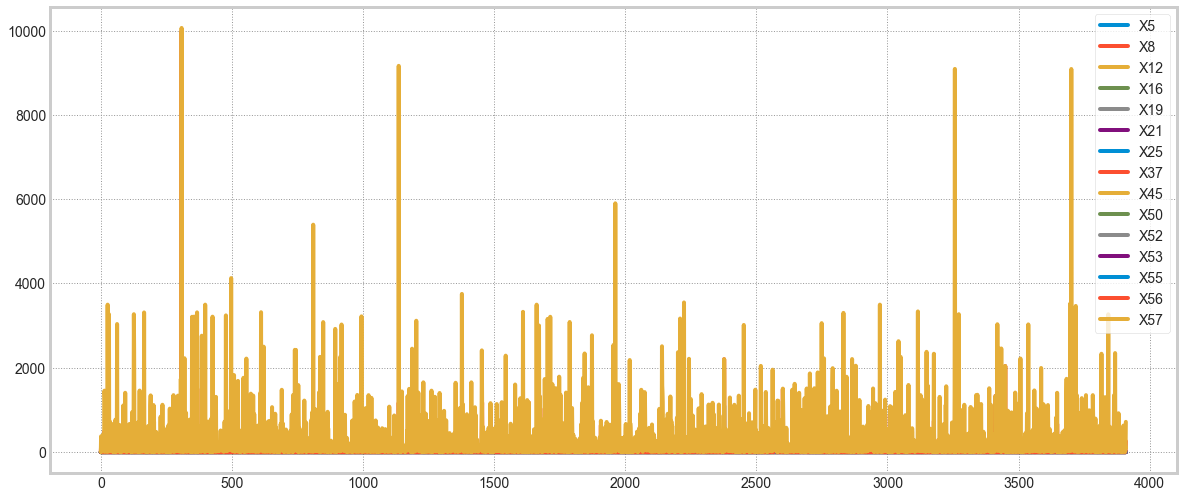

In [116]:
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"}) # set the style of the plot
X.plot(figsize=(18, 8))
plt.style.use('fivethirtyeight') 
plt.show()

## Correlation between independent variables


In [65]:
# Find the correlation between our independent variables
corr_matrix = X.corr() # find the correlation between the independent variables
corr_matrix 

,X5,X8,X12,X16,X19,X21,X25,X37,X45,X50,X52,X53,X55,X56,X57
X5,1.00,0.03,0.07,0.10,0.10,0.14,-0.09,-0.07,-0.04,-0.05,0.03,0.04,0.05,0.05,0.00
X8,0.03,1.00,-0.00,0.05,0.03,0.17,-0.06,-0.03,-0.00,-0.03,0.03,0.05,0.01,0.04,0.05
X12,0.07,-0.00,1.00,-0.03,0.09,0.10,-0.03,-0.02,-0.09,-0.03,0.02,0.01,-0.01,0.02,0.02
X16,0.10,0.05,-0.03,1.00,0.09,0.11,-0.09,-0.06,-0.05,-0.04,0.10,0.05,0.00,0.02,0.00
X19,0.10,0.03,0.09,0.09,1.00,0.30,-0.20,-0.13,0.09,-0.13,0.16,0.09,-0.03,0.01,-0.00
X21,0.14,0.17,0.10,0.11,0.30,1.00,-0.15,-0.11,-0.05,-0.08,0.07,0.14,0.04,0.08,0.06
X25,-0.09,-0.06,-0.03,-0.09,-0.20,-0.15,1.00,0.13,0.05,0.12,-0.09,-0.08,-0.02,-0.05,-0.05
X37,-0.07,-0.03,-0.02,-0.06,-0.13,-0.11,0.13,1.00,0.03,0.10,-0.06,-0.06,-0.01,-0.03,-0.01
X45,-0.04,-0.00,-0.09,-0.05,0.09,-0.05,0.05,0.03,1.00,0.00,0.07,-0.05,-0.03,-0.05,-0.10
X50,-0.05,-0.03,-0.03,-0.04,-0.13,-0.08,0.12,0.10,0.00,1.00,-0.03,0.05,0.05,0.41,0.14


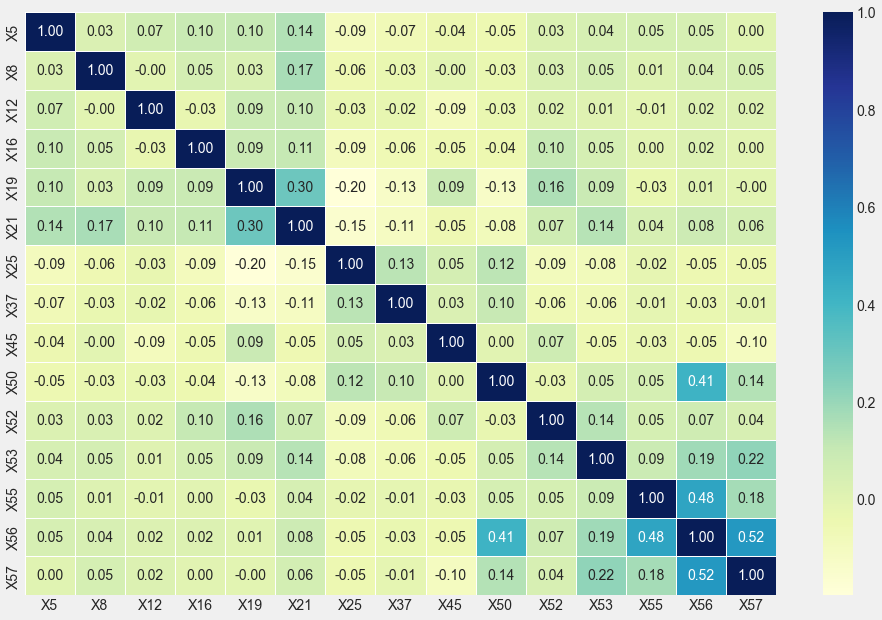

In [66]:
# Let's make it look a little prettier 
corr_matrix = X.corr() 
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

<AxesSubplot:>

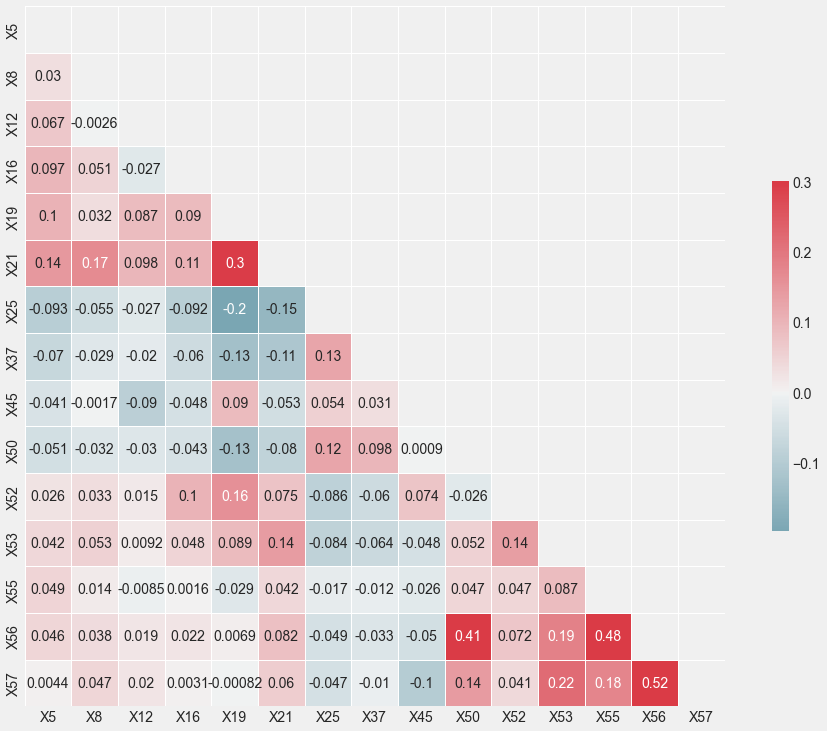

In [115]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix,
            annot=True,
            mask=mask,
            cmap=cmap,
            vmax=.3,
            center=0,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5})

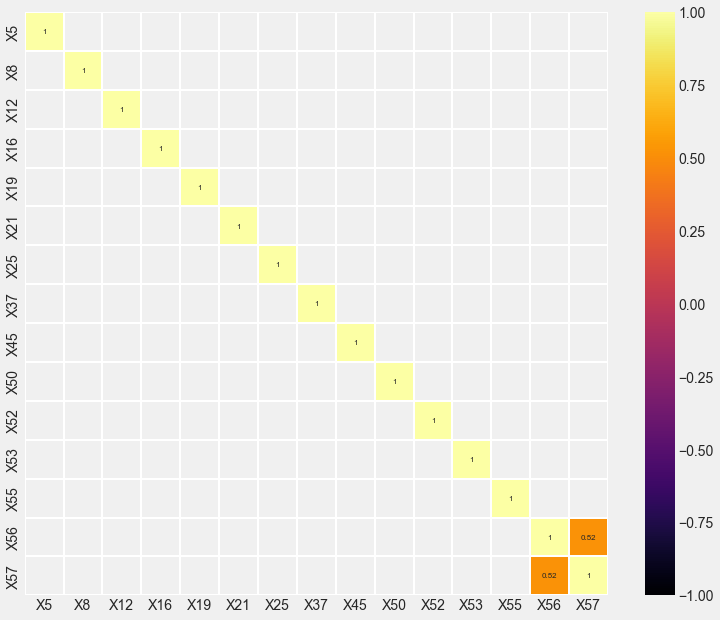

In [67]:
plt.figure(figsize=(12, 10)) 

sns.heatmap(corr_matrix[(corr_matrix >= 0.5) | (corr_matrix <= -0.4)],  # select the features with correlation greater than 0.5 or less than -0.4
            cmap='inferno', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True); 

In [68]:
# sns.pairplot(X)

# Modeling

We've explored the data, now we'll try to use machine learning to predict our target variable based on the 17 independent variables.

Train and test split

In [69]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # split the training data in training and validation set with ratio of 4:1 to evaluate performance of the model on validation set.

In [70]:
#!pip install lazypredict
### To use lazypredict in your problem statement.
import lazypredict 

## I have used this particular library to have a "feel" of the performance of all ML models with the data. Since the dataset is small, it would be better to use more "simple" models so we could focus on interpreting the results.

In [71]:
from lazypredict.Supervised import LazyClassifier 

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None) 
models,predictions = clf.fit(X_train, X_test, y_train, y_test) 

print(models)  # print the models and their respective metrics

100%|██████████| 29/29 [00:04<00:00,  6.80it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.93               0.92     0.92      0.93   
XGBClassifier                      0.93               0.92     0.92      0.93   
RandomForestClassifier             0.93               0.92     0.92      0.93   
LGBMClassifier                     0.93               0.92     0.92      0.93   
AdaBoostClassifier                 0.91               0.90     0.90      0.91   
BaggingClassifier                  0.91               0.90     0.90      0.91   
ExtraTreeClassifier                0.89               0.88     0.88      0.89   
LabelPropagation                   0.89               0.88     0.88      0.89   
DecisionTreeClassifier             0.89               0.88     0.88      0.89   
LabelSpreading                     0.89               0.88     0.88      0.89   
KNeighborsClassifier        

In [72]:
all_models = models.to_csv("all_models_score.csv", index=True)  # save the models in a csv file
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


## We would be using simple ML models like Logistic Regression, Decision Trees and maybe a Random Forest to better visualize and understand the data after modelling. 

## Model Helper Function for classification metrics

In [73]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

def print_score(classifier,X_train,y_train,X_test,y_test,train=True): # function to print the score of the model
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
        return accuracy_score(y_train,classifier.predict(X_train))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))
        return accuracy_score(y_test,classifier.predict(X_test))

I would initially use statsmodels for Logistic Regression as it is a very simple model and it is very easy and in an organized manner to interpret the results.

In [74]:
import statsmodels.api as sm # function for linear regression

log_reg = sm.Logit(y_train, X_train).fit() # fit the model

print(log_reg.summary()) # print the summary of the model

Optimization terminated successfully.
         Current function value: 0.372960
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:                 3128
Model:                          Logit   Df Residuals:                     3113
Method:                           MLE   Df Model:                           14
Date:                Wed, 22 Dec 2021   Pseudo R-squ.:                  0.4429
Time:                        18:27:48   Log-Likelihood:                -1166.6
converged:                       True   LL-Null:                       -2094.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X5             0.4137      0.086      4.797      0.000       0.245       0.583
X8             0.8994      0

### Since we have already seen the summary of the model performance with the lazyclassifier, we can use hyperparameter tuning now to tune these models and get a superior performance.

## KNN Classifier

In [75]:
#set the tuning parameters (k) for grid search
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

tuned_parameters = {
    'n_neighbors': [7, 9, 11, 13, 15,17,19],
    'algorithm': ['auto', 'ball_tree']
}

# build the KNN model
knn_clf = GridSearchCV(KNeighborsClassifier(),
                       tuned_parameters,
                       cv=10,
                       verbose = 10,
                       n_jobs=-1,
                       scoring='roc_auc')
# model fit
knn_clf.fit(X_train, y_train)
knn_clf.best_score_

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1883s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1187s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 125 out of 140 | elapsed:    3.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 140 out of

0.858094472599497

## Train Score

In [76]:
knn_train_accuracy =  print_score(knn_clf.best_estimator_,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.8469

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1903
           1       0.82      0.78      0.80      1225

    accuracy                           0.85      3128
   macro avg       0.84      0.84      0.84      3128
weighted avg       0.85      0.85      0.85      3128


Confusion Matrix:
[[1691  212]
 [ 267  958]]

Average Accuracy:	0.7929

Standard Deviation:	0.0328


## Test Score

In [77]:
knn_test_accuracy =  print_score(knn_clf.best_estimator_,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.7941

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       473
           1       0.76      0.70      0.73       309

    accuracy                           0.79       782
   macro avg       0.79      0.78      0.78       782
weighted avg       0.79      0.79      0.79       782


Confusion Matrix:
[[405  68]
 [ 93 216]]



## Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)


grid= {
    "C":np.logspace(-3,3,7), 
    "penalty":["l1","l2"]
    } # l1 lasso l2 ridge


lr_cv=GridSearchCV(lr,grid,cv=10)

lr_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [79]:
lr_train_accuracy = print_score(lr_cv.best_estimator_,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.8804

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1903
           1       0.86      0.82      0.84      1225

    accuracy                           0.88      3128
   macro avg       0.88      0.87      0.87      3128
weighted avg       0.88      0.88      0.88      3128


Confusion Matrix:
[[1744  159]
 [ 215 1010]]

Average Accuracy:	0.8788

Standard Deviation:	0.0125


## Test Score

In [80]:
lr_test_accuracy = print_score(lr_cv.best_estimator_,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.8555

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       473
           1       0.84      0.79      0.81       309

    accuracy                           0.86       782
   macro avg       0.85      0.84      0.85       782
weighted avg       0.85      0.86      0.85       782


Confusion Matrix:
[[425  48]
 [ 65 244]]



## Tuned Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier as DT

dt = DT(random_state=42)

dt.fit(X_train, y_train)
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 15],
    'min_samples_leaf': [5, 8, 10, 15, 20],
    'criterion': ["gini", "entropy"]
}

# Instantiate the grid search model
grid_search_dt = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_search_dt.fit(X_train,y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.7s finished


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 15],
                         'min_samples_leaf': [5, 8, 10, 15, 20]},
             scoring='accuracy', verbose=1)

## Training Score on DT

In [82]:
dt_train_accuracy = print_score(grid_search_dt.best_estimator_,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9441

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1903
           1       0.94      0.91      0.93      1225

    accuracy                           0.94      3128
   macro avg       0.94      0.94      0.94      3128
weighted avg       0.94      0.94      0.94      3128


Confusion Matrix:
[[1836   67]
 [ 108 1117]]

Average Accuracy:	0.9041

Standard Deviation:	0.0158


## Test Score on DT

In [83]:
dt_test_accuracy = print_score(grid_search_dt.best_estimator_,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9092

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       473
           1       0.90      0.86      0.88       309

    accuracy                           0.91       782
   macro avg       0.91      0.90      0.90       782
weighted avg       0.91      0.91      0.91       782


Confusion Matrix:
[[445  28]
 [ 43 266]]



## Visualize Tuned Decision Tree

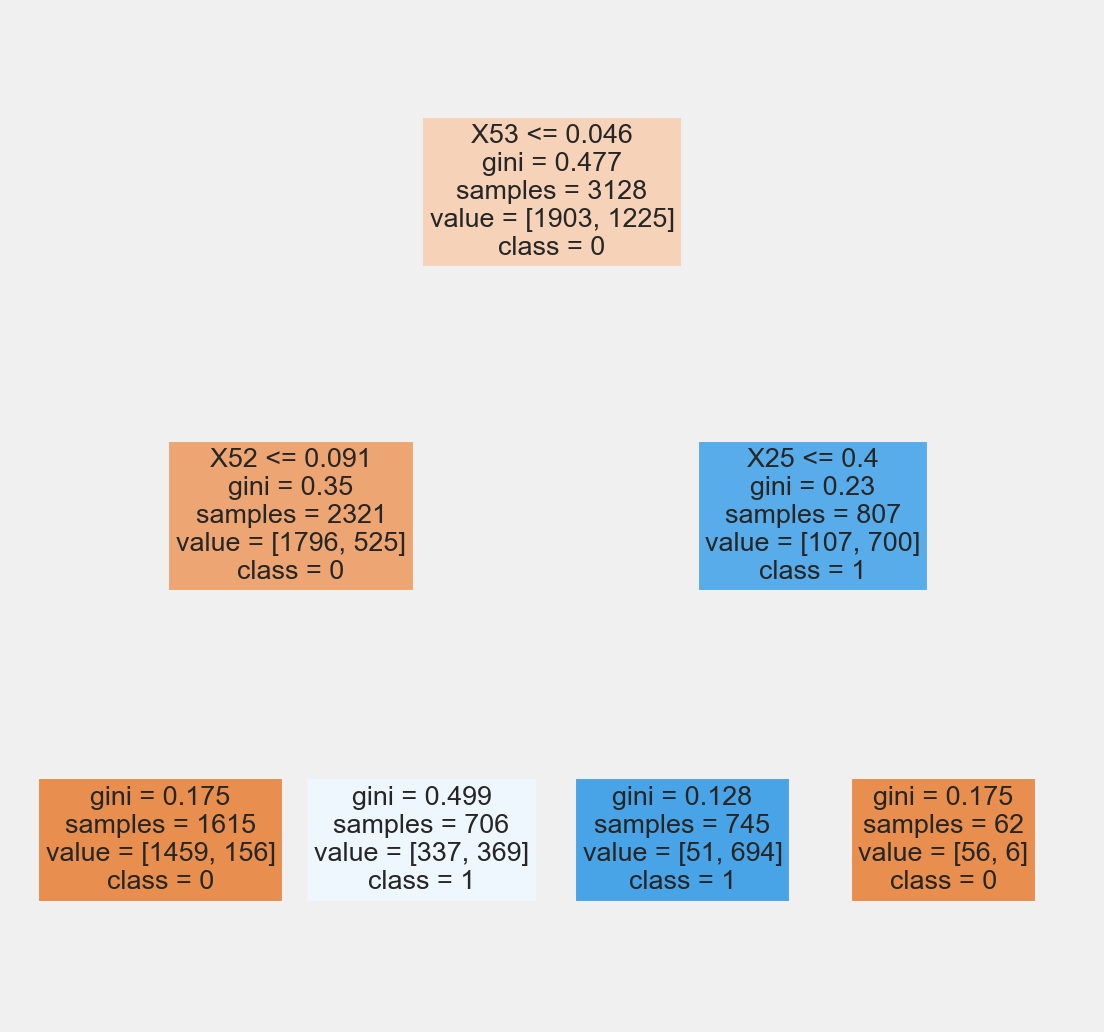

In [84]:
# Step 1: Import the model you want to use
# This was already imported earlier in the notebook so commenting out
#from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Step 2: Make an instance of the Model
clf_tree = DT(max_depth = 2, 
                             random_state = 0)
# Step 3: Train the model on the data
clf_tree.fit(X_train, y_train)
# Step 4: Predict labels of unseen (test) data
# Not doing this step as done already above
# clf.predict(X_test)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
clf_tree_plot = tree.plot_tree(clf_tree,
               feature_names = X_train.columns,
               class_names=['0','1'],
               filled = True);
clf_tree_plot
fig.savefig('Decision_Tree.png')


## Tuned Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

rfc = RandomForestClassifier(n_jobs=-1,
                             oob_score=False,
                             random_state=42)

rfc.fit(X_train, y_train)

param_grid = {
    'n_estimators': np.arange(10, 300, 30),
    'max_features': ['auto', 'log2'],
    'max_depth': [5,10,15,20,25],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [2, 3, 4],

}


grid_search_rand = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 4, n_jobs = -1, verbose = 1)

# Fit the randomized search to the data
grid_search_rand.fit(X_train, y_train)
print(grid_search_rand.best_params_)

Fitting 4 folds for each of 900 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 458 tasks      | elapsed:   53.2s
[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1258 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1808 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 2458 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 3208 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:  7.8min finished


{'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 160}


## Tuned Random Forest Training Accuracy

In [86]:
rf_train_accuracy = print_score(grid_search_rand.best_estimator_,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9808

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1903
           1       0.99      0.96      0.98      1225

    accuracy                           0.98      3128
   macro avg       0.98      0.98      0.98      3128
weighted avg       0.98      0.98      0.98      3128


Confusion Matrix:
[[1896    7]
 [  53 1172]]

Average Accuracy:	0.9326

Standard Deviation:	0.0133


## Tuned Random Forest Test Accuracy

In [87]:
rf_test_accuracy = print_score(grid_search_rand.best_estimator_,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9309

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       473
           1       0.94      0.88      0.91       309

    accuracy                           0.93       782
   macro avg       0.93      0.92      0.93       782
weighted avg       0.93      0.93      0.93       782


Confusion Matrix:
[[457  16]
 [ 38 271]]



## XGBoost

In [88]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# A parameter grid for XGBoost
params = {
    "n_estimators": np.arange(10, 200, 20),
    "min_child_weight": [1, 5, 10],
    "gamma": [0.5, 1, 1.5, 2, 5],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "max_depth": [3, 4, 5],
}

xgb = XGBClassifier(learning_rate=0.02, silent=True, nthread=1)

xgb.fit(X_train, y_train)


folds = 3
param_comb = 5


random_search_xgb = RandomizedSearchCV(
    xgb,
    param_distributions=params,
    n_iter=param_comb,
    scoring="accuracy",
    n_jobs=4,
    cv=4,
    verbose=3,
)

[18:35:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [89]:
random_search_xgb.fit(X_train, y_train)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    4.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    4.1s finished


[18:35:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.02, max_delta_step=0,
                                           max_depth=6, min_child_weight=1,
                                           missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=1,
                                           nthread=1, num...
                                           reg_lambda=1, scale_pos_weight=1,
                                           silent=True, su

## XGBM for training data

In [90]:
xgbm_train_accuracy = print_score(random_search_xgb.best_estimator_,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9325

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1903
           1       0.94      0.88      0.91      1225

    accuracy                           0.93      3128
   macro avg       0.93      0.92      0.93      3128
weighted avg       0.93      0.93      0.93      3128


Confusion Matrix:
[[1833   70]
 [ 141 1084]]

Average Accuracy:	0.9198

Standard Deviation:	0.0136


## XGBM for test data

In [91]:
xgbm_test_accuracy = print_score(random_search_xgb.best_estimator_,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9079

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       473
           1       0.91      0.85      0.88       309

    accuracy                           0.91       782
   macro avg       0.91      0.90      0.90       782
weighted avg       0.91      0.91      0.91       782


Confusion Matrix:
[[447  26]
 [ 46 263]]



## LightGBM - >  Use test subset for early stopping criterion

## This allows us to avoid overtraining and we do not need to optimise the number of trees

In [92]:
import lightgbm as lgb

fit_params = {
    "early_stopping_rounds": 30,
    "eval_metric": "auc",
    "eval_set": [(X_test, y_test)],
    "eval_names": ["valid"],
    #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
    "verbose": 100,
    "categorical_feature": "auto"}

## Hyperparameter tuning

In [93]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

param_test = {
    "num_leaves": sp_randint(6, 50),
    "min_child_samples": sp_randint(100, 500),
    "min_child_weight": [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
    "subsample": sp_uniform(loc=0.2, scale=0.8),
    "colsample_bytree": sp_uniform(loc=0.4, scale=0.6),
    "reg_alpha": [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
    "reg_lambda": [0, 1e-1, 1, 5, 10, 20, 50, 100],
}

In [94]:
# This parameter defines the number of HP points to be tested
n_HP_points_to_test = 100

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

lgb_default = lgb.LGBMClassifier().fit(X_train, y_train)

# n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
lgbm = lgb.LGBMClassifier(
    max_depth=-1,
    random_state=314,
    silent=True,
    metric="accuracy",
    n_jobs=-1,
    n_estimators=5000,
)
random_search_lgbm = RandomizedSearchCV(
    estimator=lgbm,
    n_jobs= -1,
    param_distributions=param_test,
    n_iter=n_HP_points_to_test,
    scoring="accuracy",
    cv=4,
    refit=True,
    random_state=314,
    verbose=True,
)

random_search_lgbm.fit(X_train, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  1.7min finished


RandomizedSearchCV(cv=4,
                   estimator=LGBMClassifier(metric='accuracy',
                                            n_estimators=5000, random_state=314,
                                            silent=True),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002080B674370>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002080B674580>,
                                        'min_child...ht': [1e-05, 0.001, 0.01,
                                                             0.1, 1, 10.0,
                                                             100.0, 1000.0,
                                                             10000.0],
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002080B8218B0>,
                           

## Score on Train set

In [95]:
lgbm_train_accuracy = print_score(random_search_lgbm.best_estimator_,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9987

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1903
           1       1.00      1.00      1.00      1225

    accuracy                           1.00      3128
   macro avg       1.00      1.00      1.00      3128
weighted avg       1.00      1.00      1.00      3128


Confusion Matrix:
[[1902    1]
 [   3 1222]]

Average Accuracy:	0.9345

Standard Deviation:	0.0137


## Score on Test set

In [96]:
lgbm_test_accuracy = print_score(random_search_lgbm.best_estimator_,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9246

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       473
           1       0.93      0.88      0.90       309

    accuracy                           0.92       782
   macro avg       0.93      0.92      0.92       782
weighted avg       0.92      0.92      0.92       782


Confusion Matrix:
[[452  21]
 [ 38 271]]



# Plot the ROC AUC curves

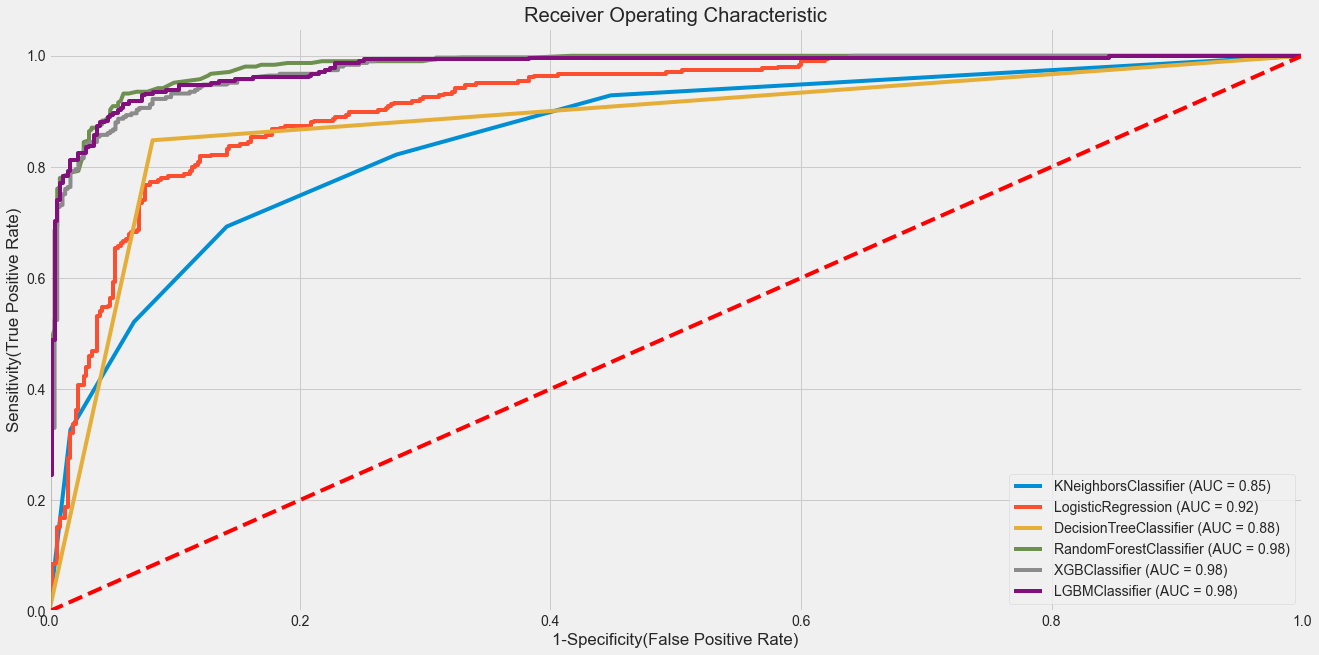

In [97]:
from sklearn.metrics import plot_roc_curve

plt.figure(figsize=(20, 10))
classifiers = [knn, lr, dt, rfc, xgb, lgb_default]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)

plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("1-Specificity(False Positive Rate)")
plt.ylabel("Sensitivity(True Positive Rate)")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()  # Display

In [98]:
pd.options.display.max_colwidth = 300

accuracy_all = pd.DataFrame(
    {
        "KNN": [knn_train_accuracy, knn_test_accuracy, knn_clf.best_params_],
        "Logistic Regression": [
            lr_train_accuracy,
            lr_test_accuracy,
            lr_cv.best_params_,
        ],
        "Decision Tree": [
            dt_train_accuracy,
            dt_test_accuracy,
            grid_search_dt.best_params_,
        ],
        "Random Forest": [
            rf_train_accuracy,
            rf_test_accuracy,
            grid_search_rand.best_params_,
        ],
        "XGBoost": [
            xgbm_train_accuracy,
            xgbm_test_accuracy,
            random_search_xgb.best_params_,
        ],
        "LightGBM": [lgbm_train_accuracy, lgbm_test_accuracy, random_search_lgbm.best_params_],
    },
    index=["Train Accuracy", "Test Accuracy", "Best Hyper Parameters"],
).T
accuracy_all

,Train Accuracy,Test Accuracy,Best Hyper Parameters
KNN,0.85,0.79,"{'algorithm': 'ball_tree', 'n_neighbors': 7}"
Logistic Regression,0.88,0.86,"{'C': 1000.0, 'penalty': 'l2'}"
Decision Tree,0.94,0.91,"{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 8}"
Random Forest,0.98,0.93,"{'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 160}"
XGBoost,0.93,0.91,"{'subsample': 1.0, 'n_estimators': 190, 'min_child_weight': 1, 'max_depth': 3, 'gamma': 5, 'colsample_bytree': 0.8}"
LightGBM,1.00,0.92,"{'colsample_bytree': 0.7173613575636579, 'min_child_samples': 134, 'min_child_weight': 1e-05, 'num_leaves': 14, 'reg_alpha': 0, 'reg_lambda': 20, 'subsample': 0.5813098915332424}"


In [99]:
accuracy_file = accuracy_all.to_csv("accuracy_all_hyperparameters.csv") # Save to csv
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


## Model with the best performance

## Based on all the models we saw, we can say that the best model is the Random Forest model based on the test set.

### But here is a question:

## Are we sure that the Random Forest model is the best model based on business requirements?

## Are we more concerned with the accuracy of the model or the interpretability of the model?

## We are concerned with the accuracy-interpretability tradeoff in this case.

## Let me use my intuition: Since we have very limited data, and the accuracies of the simpler models and the more complex models are very similar in the test set, we can say to use a simpler model like Decision Tree for our final dataset to understand the data better as well as to get a better understanding of the model.

In [100]:
accuracy_best = pd.DataFrame(
    {"Tuned Decision Tree": [
            dt_train_accuracy,
            dt_test_accuracy,
            grid_search_dt.best_params_,
    ]} ,
    index=["Train Accuracy", "Test Accuracy", "Best Hyper Parameters"]
    ).T
accuracy_best

,Train Accuracy,Test Accuracy,Best Hyper Parameters
Tuned Decision Tree,0.94,0.91,"{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 8}"


# Confusion Matrix for our best model

## Plot the confusion matrix

In [101]:
from sklearn.metrics import confusion_matrix
import itertools

#  Helper function to plot Confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap='Accent'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization
[[425  48]
 [ 65 244]]


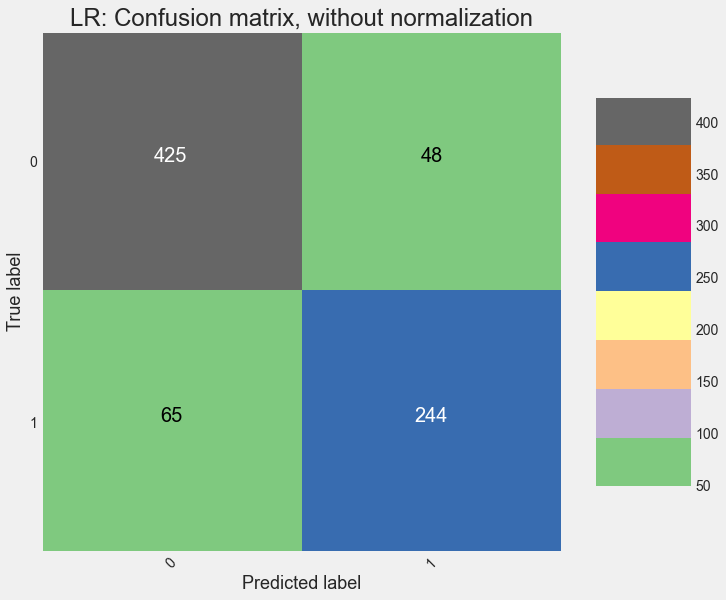

In [102]:
cm_lr = confusion_matrix(y_test, lr_cv.predict(X_test))
plot_confusion_matrix(cm_lr, classes = ['0', '1'], normalize = False,
                      title = 'LR: Confusion matrix, without normalization')

## Feature importances using the Random Forest model

In [103]:
# create the classifier with n_estimators = 100
from sklearn.ensemble import RandomForestClassifier

clf_rand = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
clf_rand.fit(X_train, y_train)


# view the feature scores
feature_scores = pd.Series(clf_rand.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores[:10]

X52   0.16
X53   0.15
X55   0.09
X21   0.09
X16   0.09
X56   0.08
X25   0.07
X57   0.06
X19   0.06
X5    0.05
dtype: float64

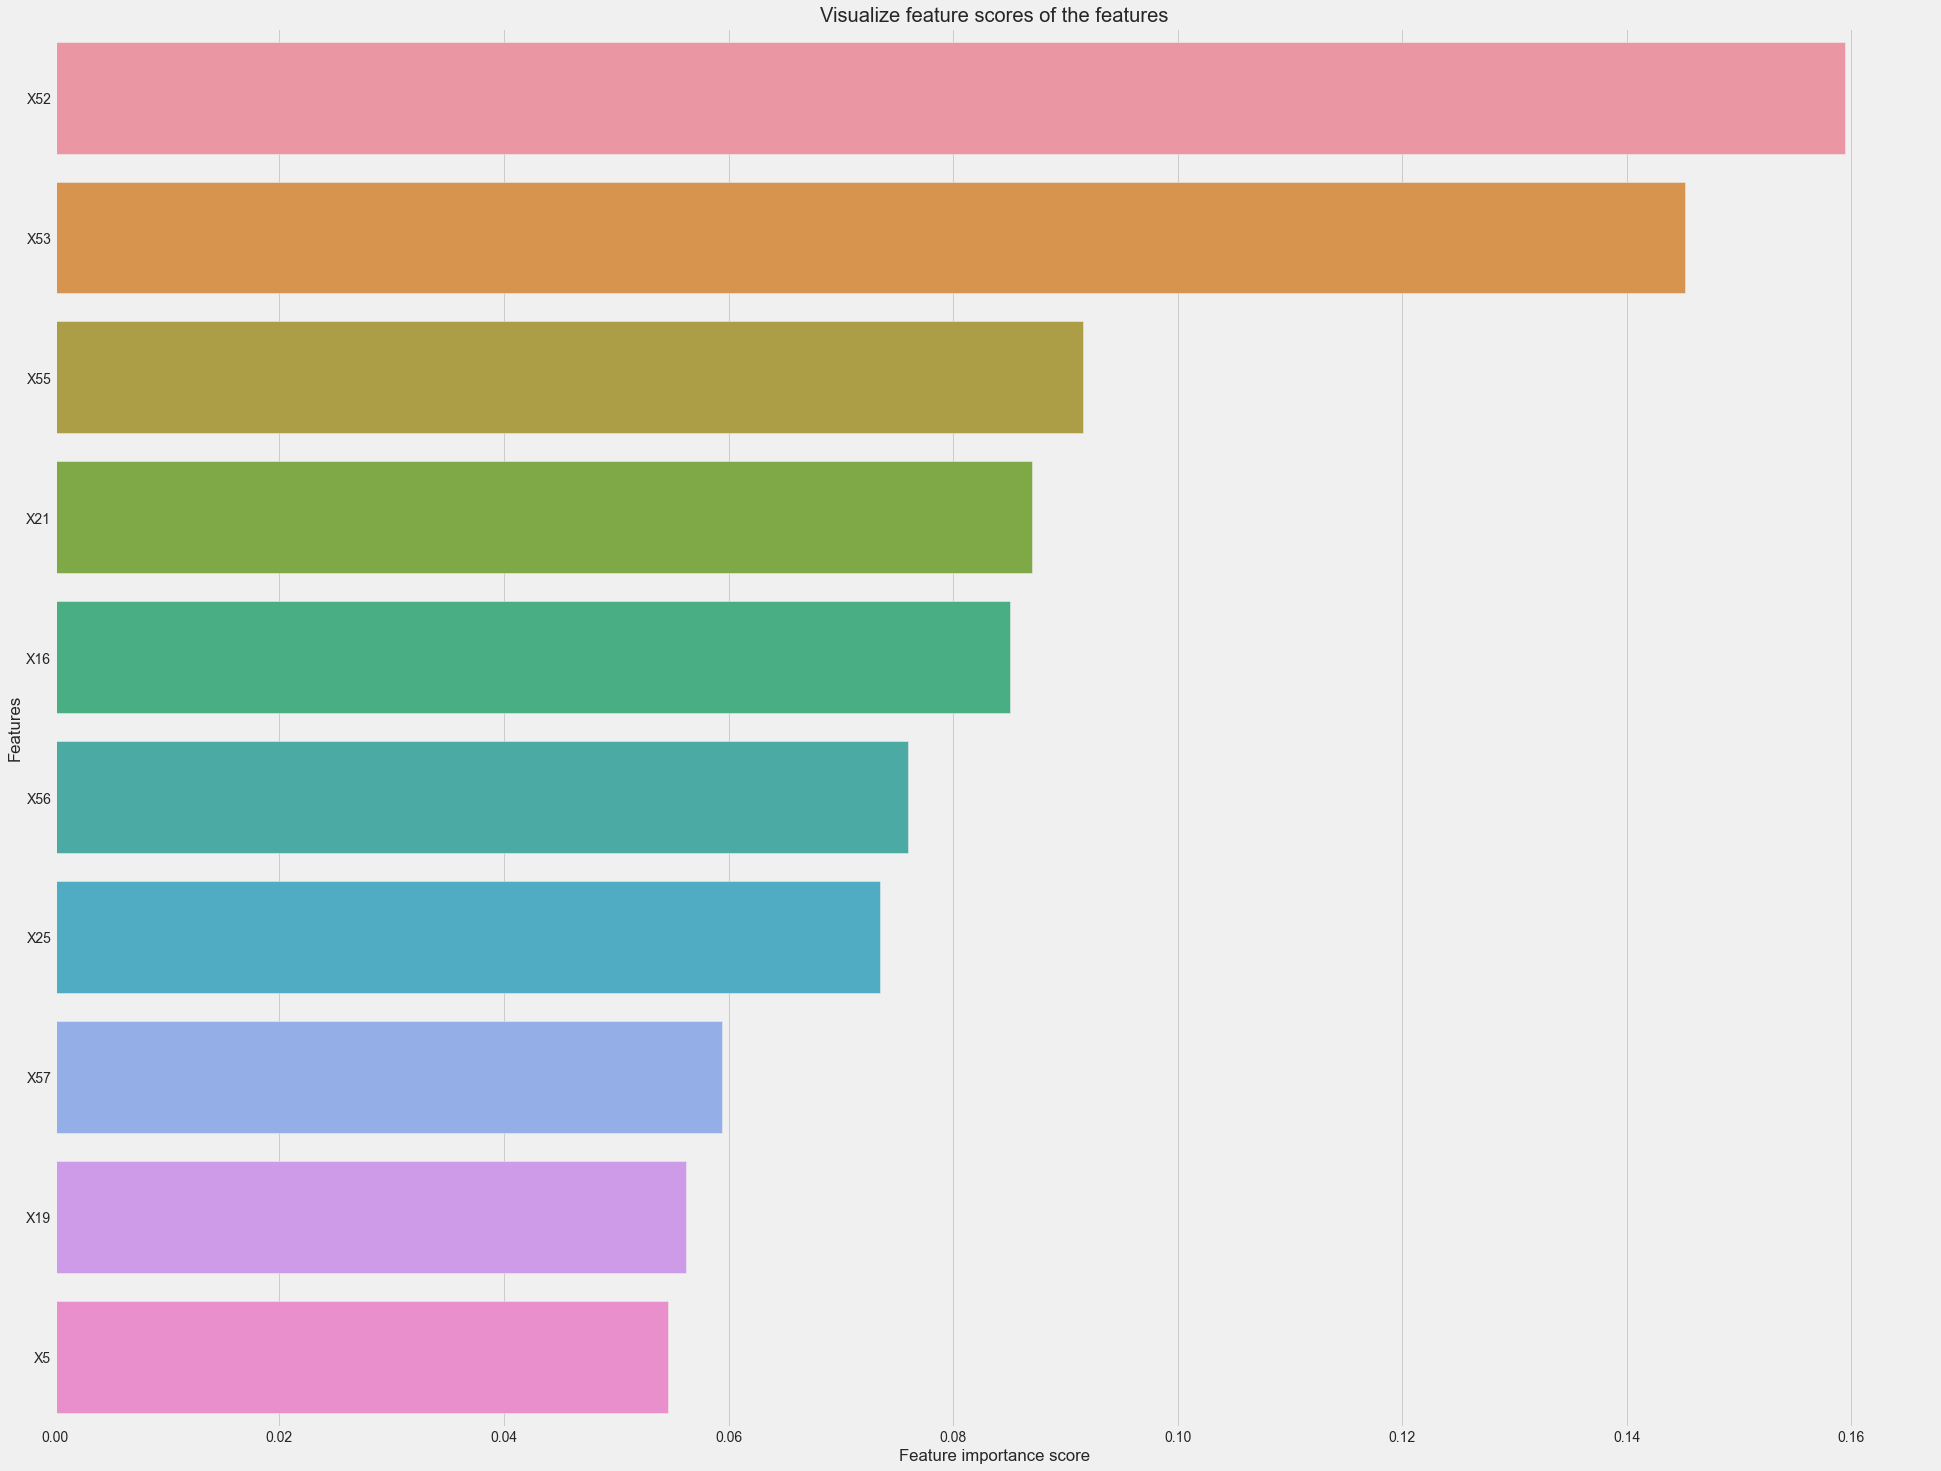

In [104]:
# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(30, 24)) 
ax = sns.barplot(x=feature_scores[:10], y=feature_scores.index[:10])
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index[:10])
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

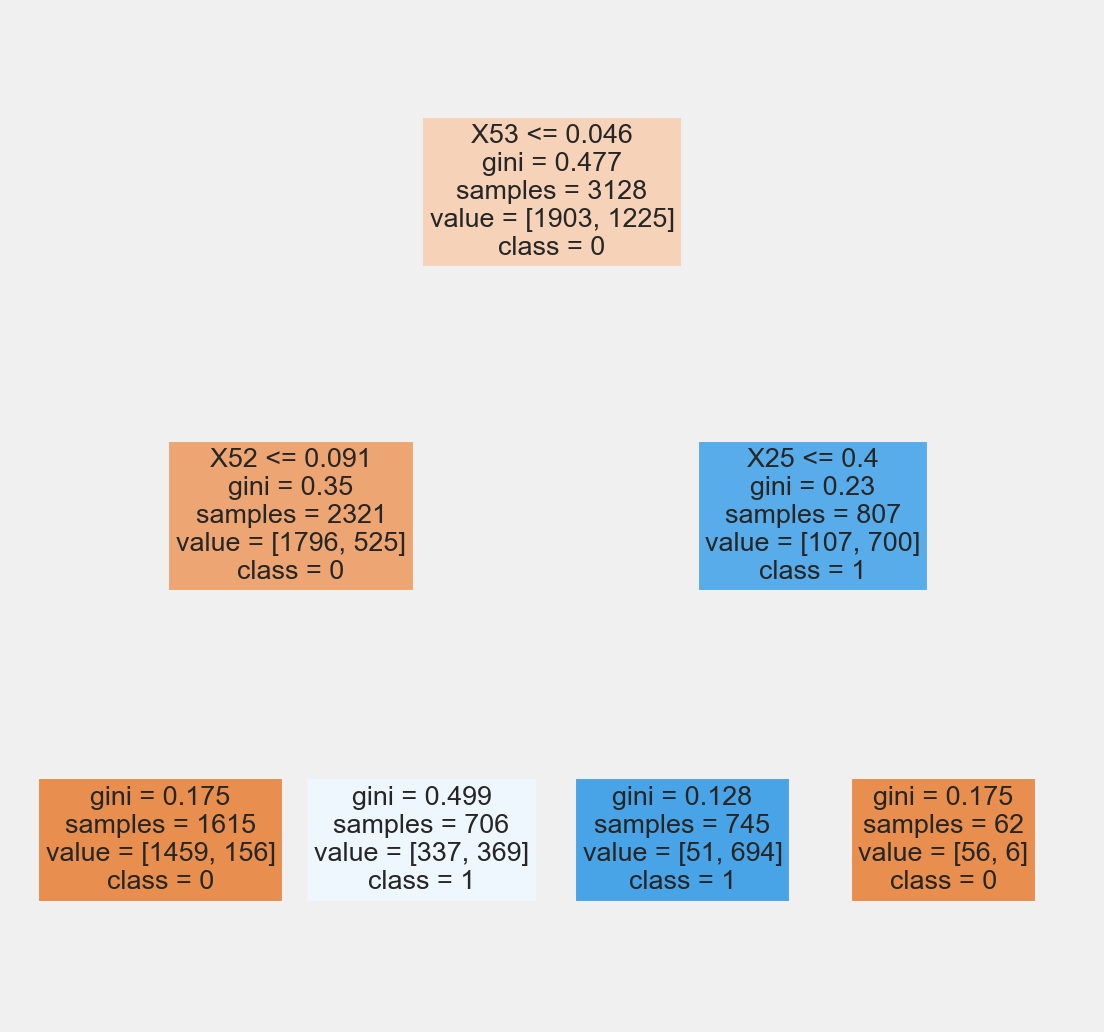

In [105]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
clf_tree_plot = tree.plot_tree(clf_tree,
               feature_names = X_train.columns,
               class_names=['0','1'],
               filled = True);
clf_tree_plot
fig.savefig('imagename.png')

## As we can see, the features which are most important for the Random Forest model are conciding with the decision tree which we plot. So, from calculation we can say that features like X52, X53, X55 and X25 etc.

# Predictions on the test data

In [106]:
test.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0,0.70,0.00,0.70,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.10,0.00,0.00,2.34,47,89
1,1,0.00,0.00,0.84,0.00,0.84,0.00,0.84,0.00,0.00,...,0.00,0.00,0.39,0.00,0.78,0.13,0.00,10.38,168,249
2,2,0.46,0.30,0.46,0.00,0.05,0.12,0.05,0.28,0.43,...,0.00,0.00,0.07,0.00,0.33,0.76,0.15,5.89,193,3040
3,3,0.10,0.20,1.01,0.00,0.80,0.80,0.50,0.00,0.80,...,0.00,0.00,0.11,0.00,0.49,0.16,0.01,8.55,669,1351
4,4,0.00,0.00,0.72,0.00,0.72,0.00,0.72,0.00,0.00,...,0.00,0.00,0.36,0.00,0.73,0.12,0.00,7.78,32,249


## Work with the test data - > Removing unnecessary columns as the train data

In [107]:
# Dropping Unnamed: 0 column as it is a duplicate of ID and a cardinal feature.

test.drop(["Unnamed: 0"],axis = 1, inplace = True) # drop the unnamed column

## Feature Selection of Test Data similair to the train data for predictions

In [108]:
test = test[embedded_lgbm_feature]

In [109]:
test.head()

,X5,X8,X12,X16,X19,X21,X25,X37,X45,X50,X52,X53,X55,X56,X57
0,0.00,0.00,0.00,0.00,2.83,0.00,0.00,0.00,1.41,0.00,0.10,0.00,2.34,47,89
1,0.84,0.00,0.00,0.00,2.54,1.69,0.00,0.00,0.00,0.39,0.78,0.13,10.38,168,249
2,0.05,0.28,0.97,0.25,3.22,1.46,0.00,0.00,0.02,0.07,0.33,0.76,5.89,193,3040
3,0.80,0.00,0.70,0.10,1.31,0.70,0.00,0.00,0.10,0.11,0.49,0.16,8.55,669,1351
4,0.72,0.00,0.00,0.00,1.45,1.45,0.00,0.00,0.00,0.36,0.73,0.12,7.78,32,249


## Predictions using Decision Tree

In [110]:
predictions = grid_search_dt.predict(test)

In [111]:
test['predictions'] = predictions

In [112]:
test['predictions']

0      0
1      1
2      1
3      1
4      1
      ..
686    0
687    0
688    0
689    0
690    0
Name: predictions, Length: 691, dtype: int64

### Saving predictions to an excel file

In [113]:
predictions_df = pd.DataFrame(test['predictions'])

# writing to Excel
datatoexcel = pd.ExcelWriter('predictions.xlsx')
  
# write DataFrame to excel
predictions_df.to_excel(datatoexcel)
  
# save the excel
datatoexcel.save()
print('DataFrame is written to Excel File successfully.')


DataFrame is written to Excel File successfully.
